<a href="https://colab.research.google.com/github/JoaoPauloSarzedasRibeiro/data_analysis_with_Python/blob/main/Spark_Conceitos_b%C3%A1sicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando o PySpark no Google Colab

In [ ]:
# instalar as dependências necessárias para o Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [ ]:
# iniciar uma sessão local chamada spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

# Manipulação de dados utilizando o Spark

In [ ]:
# Importanto a biblioteca para manipulação de colunas
from pyspark.sql.functions import col

In [ ]:
# Criando um exemplo de DataFrame
df = spark.createDataFrame([('Pedro',4),('João',5)], schema= 'nome STRING, Id STRING')

In [ ]:
df.show()

+-----+---+
| nome| Id|
+-----+---+
|Pedro|  4|
| João|  5|
+-----+---+



# Manipulação de Tipos de Dados

**Tipos básicos de dados:**

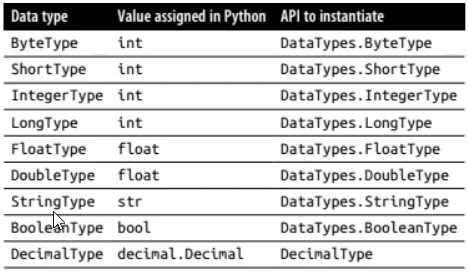


**Tipos complexos de dados:**

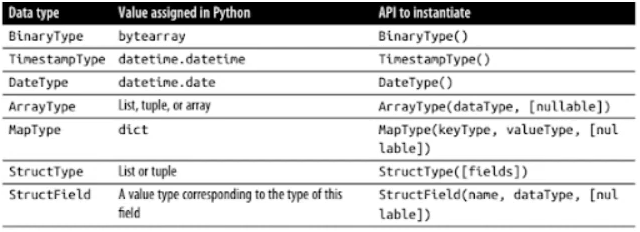

**Convertendo os tipos de dados do df criado**

In [ ]:
#Importanto a biblioteca de tipos de dados
from pyspark.sql.types import *

In [ ]:
df.dtypes

[('nome', 'string'), ('Id', 'string')]

In [ ]:
df.select('nome', col('id').cast(IntegerType())).dtypes

[('nome', 'string'), ('id', 'int')]

In [ ]:
# Simplificando a manipulação de tipos de dados
IntegerType() == 'int'
StringType() == 'string'
FloatType() == 'float'

# Devemos ter atenção na hora de definição do tipo array, pois se faz necessário definir o tipo dos dados no array
ArrayType(IntegerType()) == 'ARRAY<INT>'

False

In [ ]:
# Utilizando a forma simplificada para manipulação dos tipos de dados
df.select('nome', col('id').cast('int')).dtypes

[('nome', 'string'), ('id', 'int')]

# Definição de Schemas

In [ ]:
df = spark.createDataFrame([('Pedro', 1),('João',6),('Juliana',4),('Lucas',7)])

In [ ]:
df.dtypes

[('_1', 'string'), ('_2', 'bigint')]

**Criando schemas programaticamente**

In [ ]:
schema = StructType([
    StructField('nome', StringType()),
    StructField('id', IntegerType())
])

In [ ]:
df = spark.createDataFrame([('Pedro', 1),('João',6),('Juliana',4),('Lucas',7)], schema = schema)

In [ ]:
df.dtypes

[('nome', 'string'), ('id', 'int')]

**Criando schemas com DDL**

In [ ]:
schema = 'nome STRING, id INT'

In [ ]:
df = spark.createDataFrame([('Pedro', 1),('João',6),('Juliana',4),('Lucas',7)], schema = schema)

In [ ]:
df.dtypes

[('nome', 'string'), ('id', 'int')]

#Leitura e escrita de dados

**DataFrame Reader**

spark.read.format(format).option(args).load(file_path)

**DataFrame Writer**

spark.write.format(format).option(args).save(file_path)

**Opções ".options" mais comuns**


*  header = define se o df possui header
* inferSchema = infere o schema durante a leitura
*sep = define qual o separador de colunas
*encoding = define qual tipo de enconding a ser utilizado (Ex: latin1)

In [ ]:
#Adicionando o arquivo CSV hospedado no GitHub para que o Spark consiga acessa-lo
url = 'https://raw.githubusercontent.com/JoaoPauloSarzedasRibeiro/data_analysis_with_Python/main/data/Salaries.csv'
from pyspark import SparkFiles
spark.sparkContext.addFile(url)

In [ ]:
df = spark.read.format('csv').load(SparkFiles.get('Salaries.csv'))

In [ ]:
df.limit(5).show()

+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|_c0|              _c1|                 _c2|      _c3|        _c4|      _c5|     _c6|      _c7|             _c8| _c9| _c10|         _c11|  _c12|
+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| Id|     EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
|  1|   NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
|  2|     GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
|  3|   ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Fra

**Corrigindo a leitura do DataFrame utilizando os options**

In [ ]:
df = (
    spark
    .read
    .format('csv')
    .option('header', True)
    .option('inferSchema', True)
    .option('sep', ',')
    .option('encoding', 'latin1')
    .load(SparkFiles.get('Salaries.csv'))
)

In [ ]:
df.limit(5).show()

+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| Id|     EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|  1|   NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
|  2|     GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
|  3|   ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Francisco|  null|
|  4|CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916.0|   56120.71| 198306.9|    null|332343.61|       332343.61|2011| null|San Fra

**Corrigindo a leitura do DataFrame - Opção 2**

In [ ]:
#Utilizando um único método 'optionS' no lugar de vários métodos 'option'
df = (
    spark
    .read
    .format('csv')
    .options(header=True, sep=',', encoding='latin1', inferSchema=True)
    .load(SparkFiles.get('Salaries.csv'))
)
df.limit(5).show()

+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| Id|     EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|  1|   NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
|  2|     GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
|  3|   ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Francisco|  null|
|  4|CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916.0|   56120.71| 198306.9|    null|332343.61|       332343.61|2011| null|San Fra

**Utilizando um dicionário para tornar o método acima mais organizado**

In [ ]:
#Tornando o método options em um dicionário
options_dict = {
    'header':'True',
    'sep':',',
    'encoding':'latin1',
    'inferSchema':'True',
}

#Fazendo a leitura do DatraFrame utilizando o método options chamando o dicionário
df = (
    spark
    .read
    .format('csv')
    .options(**options_dict)
    .load(SparkFiles.get('Salaries.csv'))
)

#Mostrando as 5 primeiras linhas do DataFrame lido
df.limit(5).show()

+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| Id|     EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|  1|   NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
|  2|     GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
|  3|   ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Francisco|  null|
|  4|CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916.0|   56120.71| 198306.9|    null|332343.61|       332343.61|2011| null|San Fra

**Lendo e escrevendo JSON**

In [ ]:
df.write.format('json').save('df_salaries.json')

In [ ]:
df_json = spark.read.format('json').load('df_salaries.json')

In [ ]:
df_json.limit(5).show()

+-------------+---------+--------+-----------------+---+--------------------+---------+-----------+------+---------+----------------+----+
|       Agency|  BasePay|Benefits|     EmployeeName| Id|            JobTitle| OtherPay|OvertimePay|Status| TotalPay|TotalPayBenefits|Year|
+-------------+---------+--------+-----------------+---+--------------------+---------+-----------+------+---------+----------------+----+
|San Francisco|167411.18|    null|   NATHANIEL FORD|  1|GENERAL MANAGER-M...|400184.25|        0.0|  null|567595.43|       567595.43|2011|
|San Francisco|155966.02|    null|     GARY JIMENEZ|  2|CAPTAIN III (POLI...|137811.38|  245131.88|  null|538909.28|       538909.28|2011|
|San Francisco|212739.13|    null|   ALBERT PARDINI|  3|CAPTAIN III (POLI...|  16452.6|  106088.18|  null|335279.91|       335279.91|2011|
|San Francisco|  77916.0|    null|CHRISTOPHER CHONG|  4|WIRE ROPE CABLE M...| 198306.9|   56120.71|  null|332343.61|       332343.61|2011|
|San Francisco| 134401.6|  

In [ ]:
#Podemos perceber que o JSON tem a capacidade de manter o Schema original, diferente de quando escrevemos os dados em CSV
df_json.printSchema()

root
 |-- Agency: string (nullable = true)
 |-- BasePay: double (nullable = true)
 |-- Benefits: double (nullable = true)
 |-- EmployeeName: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- JobTitle: string (nullable = true)
 |-- OtherPay: double (nullable = true)
 |-- OvertimePay: double (nullable = true)
 |-- Status: string (nullable = true)
 |-- TotalPay: double (nullable = true)
 |-- TotalPayBenefits: double (nullable = true)
 |-- Year: long (nullable = true)



**Lendo e escrevendo em Parquet**

Parquet é considerado o formato 'correto' a ser utilizado com o Spark, pois, diferente do CSV, o Parquet utiliza armazenamento colunar, possibilitando ignorar dados não relevantes para a consulta realizada e trazendo um ganho de eficiência para a operação. Além disto, o Parquet preserva os metadados, incluindo tipos de colunas, o que garante eficiência e praticidade nas operações de escrita e leitura.


In [ ]:
#Escrevendo os dados no formato parquet
df.write.format('parquet').save('df_salaries')

In [ ]:
df_parquet = spark.read.format('parquet').load('df_salaries')

In [ ]:
df_parquet.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- EmployeeName: string (nullable = true)
 |-- JobTitle: string (nullable = true)
 |-- BasePay: double (nullable = true)
 |-- OvertimePay: double (nullable = true)
 |-- OtherPay: double (nullable = true)
 |-- Benefits: double (nullable = true)
 |-- TotalPay: double (nullable = true)
 |-- TotalPayBenefits: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Status: double (nullable = true)



**Método mode:**

* append: arquivos empilhados aos ja existentes
* ignore:retorna um erro silencioso
* overwrite: sobrescreve os dados já existentes
* error (default): retorna erro se já existem dados

In [ ]:
df.write.format('parquet').mode('overwrite').save('df_salaries')